In [2]:
import numpy as np

In [3]:
a = np.array([1, 2, 3, 4])
b = np.array((5, 6, 7, 8))
c = np.array([[1, 2, 3, 4],[4, 5, 6, 7], [7, 8, 9, 10]])

In [7]:
print(c)

[[ 1  2  3  4]
 [ 4  5  6  7]
 [ 7  8  9 10]]


In [11]:
print(c.shape)
# 当某个轴的元素为-1时，将根据数组元素的个数自动计算此轴的长度，因此下面的程序将数组c的
# shape改为了(2,6)：
c.shape=2,-1

(3, 4)


In [12]:
print(c)

[[ 1  2  3  4  4  5]
 [ 6  7  7  8  9 10]]


In [13]:
# 使用数组的reshape方法，可以创建一个改变了尺寸的新数组，原数组的shape保持不变
d = a.reshape((2,2))

In [14]:
print(d)

[[1 2]
 [3 4]]


In [16]:
print(a)

[1 2 3 4]


In [17]:
# 数组a和d其实共享数据存储内存区域，因此修改其中任意一个数组的元素都会同时修改另外一个数组
# 的内容：
a[1] = 100
d

array([[  1, 100],
       [  3,   4]])

In [18]:
# 数组的元素类型可以通过dtype属性获得。上面例子中的参数序列的元素都是整数，因此所创建的数组
# 的元素类型也是整数，并且是32bit的长整型。可以通过dtype参数在创建时指定元素类型:
np.array([[1, 2, 3, 4],[4, 5, 6, 7], [7, 8, 9, 10]], dtype=np.float)

array([[  1.,   2.,   3.,   4.],
       [  4.,   5.,   6.,   7.],
       [  7.,   8.,   9.,  10.]])

In [19]:
np.array([[1, 2, 3, 4],[4, 5, 6, 7], [7, 8, 9, 10]], dtype=np.complex)

array([[  1.+0.j,   2.+0.j,   3.+0.j,   4.+0.j],
       [  4.+0.j,   5.+0.j,   6.+0.j,   7.+0.j],
       [  7.+0.j,   8.+0.j,   9.+0.j,  10.+0.j]])

In [20]:
# arange函数类似于python的range函数，通过指定开始值、终值和步长来创建一维数组，注意
# 数组不包括终值:
print(np.arange(0,1,0.1))

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]


In [22]:
# linspace函数通过指定开始值、终值和元素个数来创建一维数组，可以通过endpoint关键字指定
# 是否包括终值，缺省设置是包括终值:
np.linspace(0,1,12,endpoint=False)

array([ 0.        ,  0.08333333,  0.16666667,  0.25      ,  0.33333333,
        0.41666667,  0.5       ,  0.58333333,  0.66666667,  0.75      ,
        0.83333333,  0.91666667])

In [23]:
np.linspace(0,1,12)

array([ 0.        ,  0.09090909,  0.18181818,  0.27272727,  0.36363636,
        0.45454545,  0.54545455,  0.63636364,  0.72727273,  0.81818182,
        0.90909091,  1.        ])

In [24]:
# logspace函数和linspace类似，不过它创建等比数列，下面的例子产生1(10^0)到100(10^2)、
# 有20个元素的等比数列:
np.logspace(0,1,20)

array([  1.        ,   1.12883789,   1.27427499,   1.43844989,
         1.62377674,   1.83298071,   2.06913808,   2.33572147,
         2.6366509 ,   2.97635144,   3.35981829,   3.79269019,
         4.2813324 ,   4.83293024,   5.45559478,   6.15848211,
         6.95192796,   7.8475997 ,   8.8586679 ,  10.        ])

In [25]:
# 使用frombuffer, fromstring, fromfile等函数可以从字节序列创建数组
s = 'abcdefgh'
# Python的字符串实际上是字节序列，每个字符占一个字节，因此如果从字符串s创建一个8bit的整数数
# 组的话，所得到的数组正好就是字符串中每个字符的ASCII编码:
np.fromstring(s,dtype=np.int8)

array([ 97,  98,  99, 100, 101, 102, 103, 104], dtype=int8)

In [26]:
# 如果从字符串s创建16bit的整数数组，那么两个相邻的字节就表示一个整数，把字节98和字节97当作
# 一个16位的整数，它的值就是98*256+97 = 25185。可以看出内存中是以little endian(低位字节在
# 前)方式保存数据的。
np.fromstring(s,dtype=np.int16)

array([25185, 25699, 26213, 26727], dtype=int16)

In [27]:
98*256+97

25185

In [31]:
#它将数组下标转换为数组中对应的值，然后使用此函数创建数组
def func(i):
    print(i)
    return i%4+1

In [32]:
np.fromfunction(func,(10,))

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]


array([ 1.,  2.,  3.,  4.,  1.,  2.,  3.,  4.,  1.,  2.])

In [33]:
def func2(i,j):
    return (i+1)*(j+1)

In [34]:
print(np.fromfunction(func2,(9,9)))

[[  1.   2.   3.   4.   5.   6.   7.   8.   9.]
 [  2.   4.   6.   8.  10.  12.  14.  16.  18.]
 [  3.   6.   9.  12.  15.  18.  21.  24.  27.]
 [  4.   8.  12.  16.  20.  24.  28.  32.  36.]
 [  5.  10.  15.  20.  25.  30.  35.  40.  45.]
 [  6.  12.  18.  24.  30.  36.  42.  48.  54.]
 [  7.  14.  21.  28.  35.  42.  49.  56.  63.]
 [  8.  16.  24.  32.  40.  48.  56.  64.  72.]
 [  9.  18.  27.  36.  45.  54.  63.  72.  81.]]


In [36]:
a = np.arange(10)

In [37]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [38]:
a[:-1]

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [39]:
a[::-1] # 省略范围的开始下标和结束下标，步长为-1，整个数组头尾颠倒

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [40]:
a[5:1:-2] # 步长为负数时，开始下标必须大于结束下标

array([5, 3])

In [41]:
# 和Python的列表序列不同，通过下标范围获取的新的数组是原始数组的一个视图。它与原始数组共享
# 同一块数据空间
b = a[3:7]

In [42]:
b

array([3, 4, 5, 6])

In [43]:
b[2] = 1111

In [44]:
b

array([   3,    4, 1111,    6])

In [45]:
a

array([   0,    1,    2,    3,    4, 1111,    6,    7,    8,    9])

In [46]:
# 当使用整数序列对数组元素进行存取时，将使用整数序列中的每个元素作为下标，整数序列可以是列
# 表或者数组。使用整数序列作为下标获得的数组不和原始数组共享数据空间。
x = np.arange(10,1,-1)
x

array([10,  9,  8,  7,  6,  5,  4,  3,  2])

In [47]:
x[[3, 3, 1, 8]] # 获取x中的下标为3, 3, 1, 8的4个元素，组成一个新的数组

array([7, 7, 9, 2])

In [49]:
b = x[np.array([3,3,-3,8])] #下标可以是负数
b

array([7, 7, 4, 2])

In [55]:
# 当使用布尔数组b作为下标存取数组x中的元素时，将收集数组x中所有在数组b中对应下标为True的
# 元素。使用布尔数组作为下标获得的数组不和原始数组共享数据空间，注意这种方式只对应于布尔数
# 组，不能使用布尔列表。
x = np.arange(5,0,-1)

In [56]:
x

array([5, 4, 3, 2, 1])

In [57]:
x[np.array([True, False, True, False, False])]# 布尔数组中下标为0，2的元素为True，因此获取x中下标为0,2的元素

array([5, 3])

In [58]:
x[[True, False, True, False, False]]  # 如果是布尔列表，则把True当作1, False当作0，按照整数序列方式获取x中的元素

array([5, 3])

In [60]:
np.arange(0, 60, 10).reshape(-1, 1) + np.arange(0, 6)

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

In [67]:
# 我们先创建一个dtype对象persontype，通过其字典参数描述结构类型的各个字段。字典有两个关
# 键字：names，formats。每个关键字对应的值都是一个列表。names定义结构中的每个字段名，而
# formats则定义每个字段的类型：
# • S32 : 32个字节的字符串类型，由于结构中的每个元素的大小必须固定，因此需要指定字符串的
# 长度
# • i : 32bit的整数类型，相当于np.int32
# • f : 32bit的单精度浮点数类型，相当于np.float32
persontype = np.dtype({
'names':['name', 'age', 'weight'],
'formats':['S32','i', 'f']})

In [65]:
a = np.array([("Zhang",32,75.5),("Wang",24,65.2)],
dtype=persontype)

In [66]:
a

array([(b'Zhang', 32,  75.5       ), (b'Wang', 24,  65.19999695)],
      dtype=[('name', 'S32'), ('age', '<i4'), ('weight', '<f4')])

In [69]:
# 一个包含多个组元的列表，其中形如(字段名, 类型描
# 述) 的组元描述了结构中的每个字段。类型描述前面为我们添加了`|', `<' 等字符，这些字符用来描述字
# 段值的字节顺序：
# | : 忽视字节顺序
# • < : 低位字节在前
# • > : 高位字节在前
a.dtype

dtype([('name', 'S32'), ('age', '<i4'), ('weight', '<f4')])

In [70]:
a[0]

(b'Zhang', 32,  75.5)

In [71]:
c = a[1]
c['name']='ana'

In [72]:
a[1]

(b'ana', 24,  65.19999695)

In [73]:
b=a[:]["age"] # 或者a["age"]

In [75]:
a['age']

array([32, 24], dtype=int32)

In [76]:
b[0] = 40

In [77]:
a['age']

array([40, 24], dtype=int32)

In [79]:
# 通过调用a.tostring或者a.tofile方法，可以直接输出数组a的二进制形式
a.tofile('test.bin')

In [83]:
x = np.linspace(0, 2*np.pi, 10) #先用linspace产生一个从0到2*PI的等距离的10个数

In [84]:
y = np.sin(x)

In [85]:
y

array([  0.00000000e+00,   6.42787610e-01,   9.84807753e-01,
         8.66025404e-01,   3.42020143e-01,  -3.42020143e-01,
        -8.66025404e-01,  -9.84807753e-01,  -6.42787610e-01,
        -2.44929360e-16])

In [86]:
a = np.arange(0, 60, 10).reshape(-1, 1)

In [87]:
a

array([[ 0],
       [10],
       [20],
       [30],
       [40],
       [50]])

In [88]:
b = np.arange(0, 5)

In [89]:
b

array([0, 1, 2, 3, 4])

In [90]:
c = a + b

In [91]:
c

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44],
       [50, 51, 52, 53, 54]])

In [92]:
c.shape

(6, 5)

In [93]:
a = np.matrix([[1,2,3],[5,5,6],[7,9,9]])

In [94]:
a

matrix([[1, 2, 3],
        [5, 5, 6],
        [7, 9, 9]])

In [95]:
# 首先创建两个3维数组
a = np.arange(12).reshape(2,3,2)

In [96]:
a

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]]])

In [97]:
b = np.arange(12,24).reshape(2,2,3)

In [98]:
b

array([[[12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23]]])

In [105]:
c = np.dot(a,b)

In [106]:
c

array([[[[ 15,  16,  17],
         [ 21,  22,  23]],

        [[ 69,  74,  79],
         [ 99, 104, 109]],

        [[123, 132, 141],
         [177, 186, 195]]],


       [[[177, 190, 203],
         [255, 268, 281]],

        [[231, 248, 265],
         [333, 350, 367]],

        [[285, 306, 327],
         [411, 432, 453]]]])

In [111]:
import matplotlib.pyplot as plt

In [112]:
x = np.linspace(0,10,1000)

In [113]:
x

array([  0.        ,   0.01001001,   0.02002002,   0.03003003,
         0.04004004,   0.05005005,   0.06006006,   0.07007007,
         0.08008008,   0.09009009,   0.1001001 ,   0.11011011,
         0.12012012,   0.13013013,   0.14014014,   0.15015015,
         0.16016016,   0.17017017,   0.18018018,   0.19019019,
         0.2002002 ,   0.21021021,   0.22022022,   0.23023023,
         0.24024024,   0.25025025,   0.26026026,   0.27027027,
         0.28028028,   0.29029029,   0.3003003 ,   0.31031031,
         0.32032032,   0.33033033,   0.34034034,   0.35035035,
         0.36036036,   0.37037037,   0.38038038,   0.39039039,
         0.4004004 ,   0.41041041,   0.42042042,   0.43043043,
         0.44044044,   0.45045045,   0.46046046,   0.47047047,
         0.48048048,   0.49049049,   0.5005005 ,   0.51051051,
         0.52052052,   0.53053053,   0.54054054,   0.55055055,
         0.56056056,   0.57057057,   0.58058058,   0.59059059,
         0.6006006 ,   0.61061061,   0.62062062,   0.63

In [115]:
y = np.sin(x)

In [116]:
z = np.cos(x**2)

In [144]:
# figure创建一个绘图对象，并且使它成为当前的绘图对象。
plt.figure(figsize=(8,4))

In [145]:
plt.plot(x,y,label='$sin(x)$',color='red',linewidth=2)

In [146]:
# b--其中b表示蓝色，''--``表示线型为虚线
plt.plot(x,z,'b--',label='$cos(x^2)$')

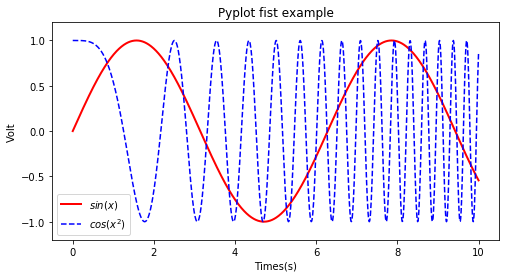

In [147]:
plt.xlabel('Times(s)')
plt.ylabel('Volt')
plt.title('Pyplot fist example')
plt.ylim(-1.2,1.2)
plt.legend() #legend : 显示图示
plt.show()

In [138]:
import matplotlib

In [139]:
matplotlib.rcParams['savefig.dpi']

'figure'

In [142]:
# 第二句直接通过第三个参数''b--``指定曲线的颜色和线型，这个参数称为格式化参数，它能够通过
# 一些易记的符号快速指定曲线的样式。其中b表示蓝色，''--``表示线型为虚线。在IPython中输入
# ``plt.plot?'' 可以查看格式化字符串的详细配置。
plt.plot?

In [150]:
x = np.arange(0, 5, 0.1)
line, = plt.plot(x, x*x) # plot返回一个列表，通过line,获取其第一个元素

In [152]:
# 调用Line2D对象的set_*方法设置属性值
line.set_antialiased(False) 

In [153]:
# 同时绘制sin和cos两条曲线，lines是一个有两个Line2D对象的列表
lines = plt.plot(x, np.sin(x), x, np.cos(x)) #

In [155]:
# 调用setp函数同时配置多个Line2D对象的多个属性值
plt.setp(lines, color="r", linewidth=2.0)
# 这段例子中，通过调用Line2D对象line的set_antialiased方法，关闭对象的反锯齿效果。或者通过调
# 用plt.setp函数配置多个Line2D对象的颜色和线宽属性。

[None, None, None, None]

d:\programs\python\python35\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


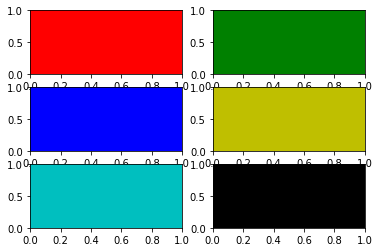

In [161]:
for idx, color in enumerate("rgbyck"):
    plt.subplot(320+idx+1, axisbg=color)
plt.show()

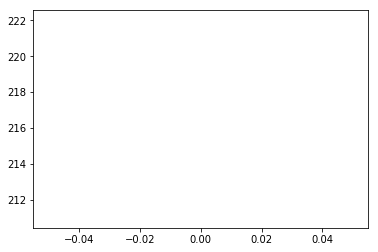

In [162]:
plt.plot(221)
plt.plot(222)
plt.plot(211)
plt.show()

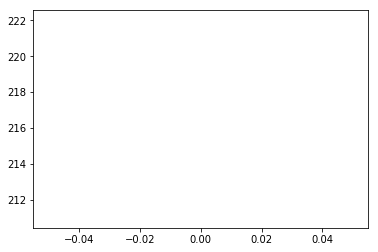

In [163]:
plt.plot(221)
plt.plot(222)
plt.plot(211)
plt.show()

In [164]:
matplotlib.rc_params()

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.mencoder_args': [],
          'animation.mencoder_path': 'mencoder',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'k',
          'axes.facecolor': 'w',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use

In [165]:
# 下面首先调用pyplot.figure辅助函数创建Figure对象，然后调用Figure对象的add_axes方法在其中创
# 建一个Axes对象，add_axes的参数是一个形如[left, bottom, width, height]的列表，这些数值分别指
# 定所创建的Axes对象相对于fig的位置和大小，取值范围都在0到1之间：
fig = plt.figure()
ax = fig.add_axes([0.15, 0.1, 0.7, 0.3])